In [2]:
%matplotlib inline
import numpy as np
from QuantLib import *
import matplotlib.pyplot as plt

today = Date(17, October, 2016)
Settings.instance().evaluationDate = today

data = [ (2, 0.02), (4, 0.0225), (6, 0.025), (8, 0.0275), (10, 0.03), (12, 0.0325), 
	(14, 0.035), (16, 0.0375), (18, 0.04), (20, 0.0425), (22, 0.045), (24, 0.0475),
	(26, 0.05), (28, 0.0525), (30, 0.055)]


In [3]:
calendar = TARGET()
settlement = calendar.advance(today, 3, Days)
quotes = []
helpers = []
for length, coupon in data:
	maturity = calendar.advance(settlement, length, Years)
	schedule = Schedule(settlement, maturity, Period(Annual), calendar,
		ModifiedFollowing, ModifiedFollowing, DateGeneration.Backward, False)
	quote = SimpleQuote(100.0)
	quotes.append(quote)
	helpers.append(FixedRateBondHelper(QuoteHandle(quote), 3, 100.0, schedule, [coupon],
		SimpleDayCounter(), ModifiedFollowing))
	curve = FittedBondDiscountCurve(0, calendar, helpers, SimpleDayCounter(),
		NelsonSiegelFitting())


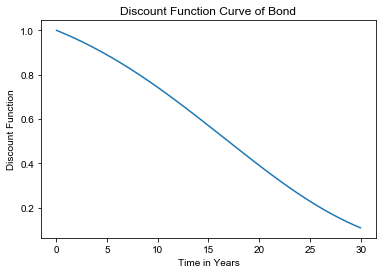

In [4]:
sample_times = np.linspace(0.0, 30.0, 301)
sample_discounts = [ curve.discount(t) for t in sample_times ]

fig = plt.figure()
plt.title("Discount Function Curve of Bond")
plt.xlabel("Time in Years")
plt.ylabel("Discount Function")
plt.style.use('seaborn-whitegrid')

xs = sample_times
ys = sample_discounts
plt.plot(xs, ys)
plt.show()
